In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [86]:
co = np.loadtxt('/home/dominiv/eigsep/data/july2025/beam_results/CoBeam Results_Slotted BowTie over a Simple Box/Freq_19921870Hz.csv', delimiter=',', skiprows=1)
cross = np.loadtxt('/home/dominiv/eigsep/data/july2025/beam_results/CrossBeam Results_Slotted BowTie over a Simple Box/Freq_19921870Hz.csv', delimiter=',', skiprows=1)
total_gain = np.loadtxt('/home/dominiv/eigsep/data/july2025/beam_results/Gain_Total/Freq_19921870Hz.csv', delimiter=',', skiprows=1)


total_theta = np.loadtxt('/home/dominiv/eigsep/data/july2025/beam_results/Gain_Theta//Freq_19921870Hz.csv', delimiter=',', skiprows=1)
total_phi = np.loadtxt('/home/dominiv/eigsep/data/july2025/beam_results/Gain_Phi//Freq_19921870Hz.csv', delimiter=',', skiprows=1)

In [89]:
total_theta

array([[-180.     ,    0.     ,    3.45628],
       [-179.     ,    0.     ,    3.45524],
       [-178.     ,    0.     ,    3.45209],
       ...,
       [ 178.     ,  180.     ,    2.90687],
       [ 179.     ,  180.     ,    2.90953],
       [ 180.     ,  180.     ,    2.91041]])

In [42]:
theta = co[:, 1]
phi = co[:, 0]
co_gain = co[:,2]
cross_gain = cross[:,2]
total_mag = total_gain[:, 2]
mag = np.sqrt(co_gain**2 + cross_gain**2)

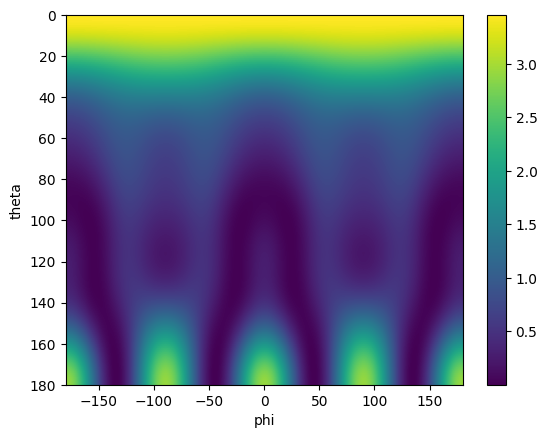

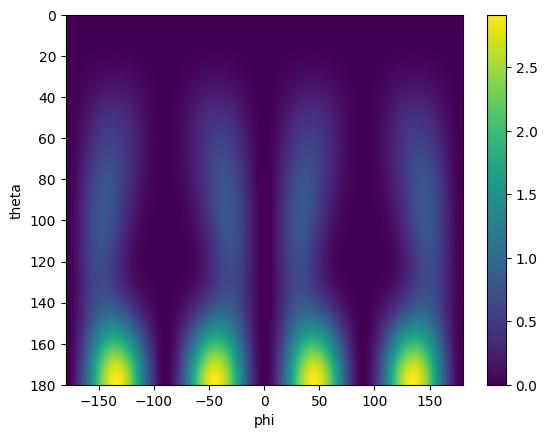

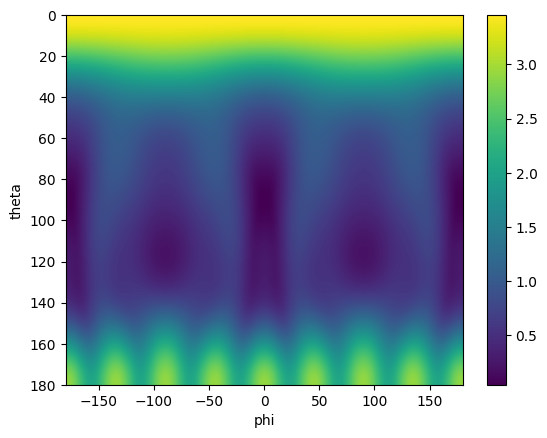

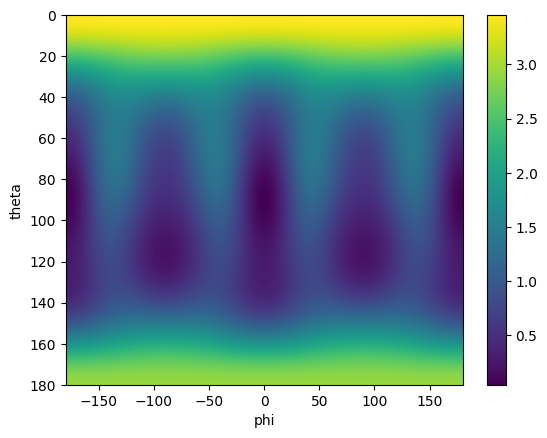

In [43]:
ph = np.unique(phi)
th = np.unique(theta)

plt.figure()
plt.imshow(co_gain.reshape(181, 361), aspect="auto", extent=[ph[0], ph[-1], th[-1], th[0]])
plt.colorbar()
plt.xlabel("phi")
plt.ylabel("theta")
plt.show()

plt.figure()
plt.imshow(cross_gain.reshape(181, 361), aspect="auto", extent=[ph[0], ph[-1], th[-1], th[0]])
plt.colorbar()
plt.xlabel("phi")
plt.ylabel("theta")
plt.show()

plt.figure()
plt.imshow(mag.reshape(181, 361), aspect="auto", extent=[ph[0], ph[-1], th[-1], th[0]])
plt.colorbar()
plt.xlabel("phi")
plt.ylabel("theta")
plt.show()

plt.figure()
plt.imshow(total_mag.reshape(181, 361), aspect="auto", extent=[ph[0], ph[-1], th[-1], th[0]])
plt.colorbar()
plt.xlabel("phi")
plt.ylabel("theta")
plt.show()

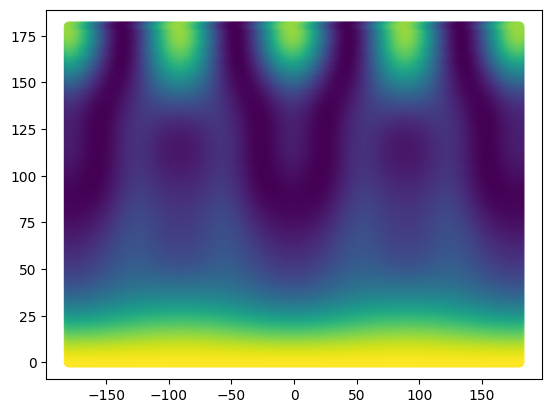

In [24]:
plt.figure()
plt.scatter(phi, theta, c=gain)
plt.show()

In [11]:
co_chat = np.loadtxt('/home/dominiv/eigsep/data/july2025/beam_results/chat/Freq_11718745Hz_standardized_angles.csv', delimiter=',', skiprows=1)

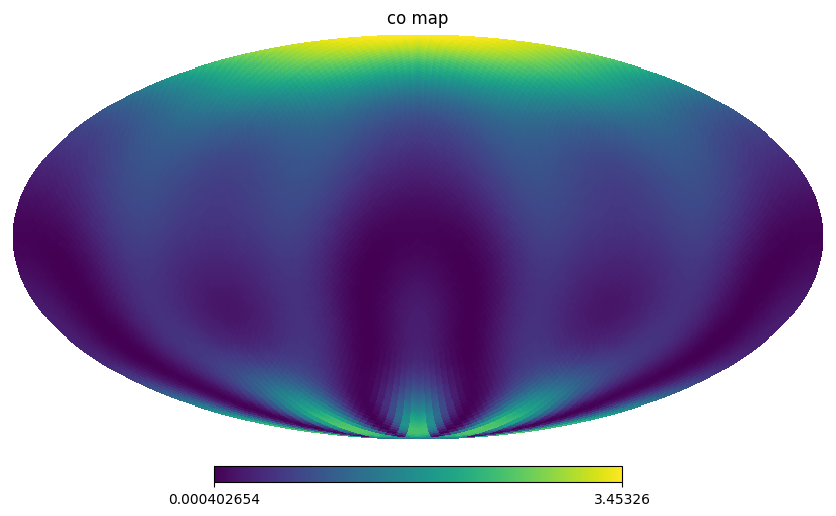

In [70]:
# theta_chat = co_chat[:, 0]
# phi_chat = co_chat[:, 1]
# gain_chat = co_chat[:, 4]

theta_chat = np.deg2rad(np.clip(theta, 0.0, 180.0))        # -> [0, pi]
phi_chat   = np.deg2rad((phi + 360.0) % 360.0)     
# theta_chat = np.deg2rad((theta))        # -> [0, pi]
# phi_chat   = np.deg2rad((phi + 360.0) % 360.0)     

NSIDE = 32  # or pick another; 74 is close for ~65k samples
NPIX = hp.nside2npix(NSIDE)
pix = hp.ang2pix(NSIDE, theta_chat, phi_chat, nest=False)

counts = np.bincount(pix, minlength=NPIX)
sums   = np.bincount(pix, weights=co_gain, minlength=NPIX)

m = np.full(NPIX, hp.UNSEEN, dtype=float)   # RING-ordered map
mask = counts > 0
m[mask] = sums[mask] / counts[mask]

hp.mollview(m, title=f"co map")


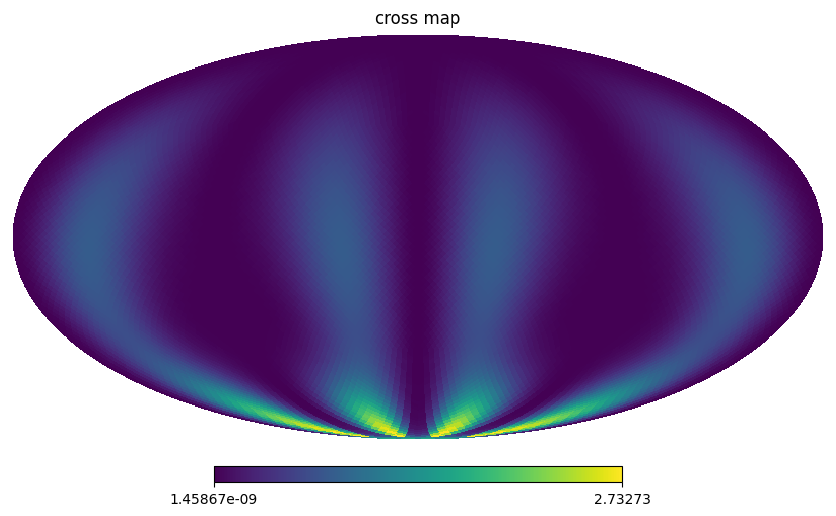

In [60]:
theta_chat = np.deg2rad(np.clip(theta, 0.0, 180.0))        # -> [0, pi]
phi_chat   = np.deg2rad((phi + 360.0) % 360.0)     

NSIDE = 32  # or pick another; 74 is close for ~65k samples
NPIX = hp.nside2npix(NSIDE)
pix = hp.ang2pix(NSIDE, theta_chat, phi_chat, nest=False)

counts = np.bincount(pix, minlength=NPIX)
sums   = np.bincount(pix, weights=cross_gain, minlength=NPIX)

m = np.full(NPIX, hp.UNSEEN, dtype=float)   # RING-ordered map
mask = counts > 0
m[mask] = sums[mask] / counts[mask]

hp.mollview(m, title=f"cross map")

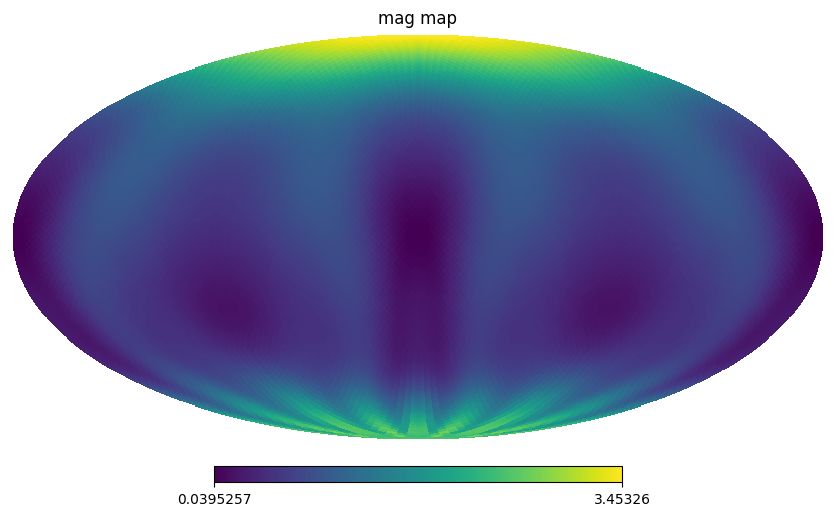

In [61]:
theta_chat = np.deg2rad(np.clip(theta, 0.0, 180.0))        # -> [0, pi]
phi_chat   = np.deg2rad((phi + 360.0) % 360.0)     

NSIDE = 32  # or pick another; 74 is close for ~65k samples
NPIX = hp.nside2npix(NSIDE)
pix = hp.ang2pix(NSIDE, theta_chat, phi_chat, nest=False)

counts = np.bincount(pix, minlength=NPIX)
sums   = np.bincount(pix, weights=mag, minlength=NPIX)

m = np.full(NPIX, hp.UNSEEN, dtype=float)   # RING-ordered map
mask = counts > 0
m[mask] = sums[mask] / counts[mask]

hp.mollview(m, title=f"mag map")

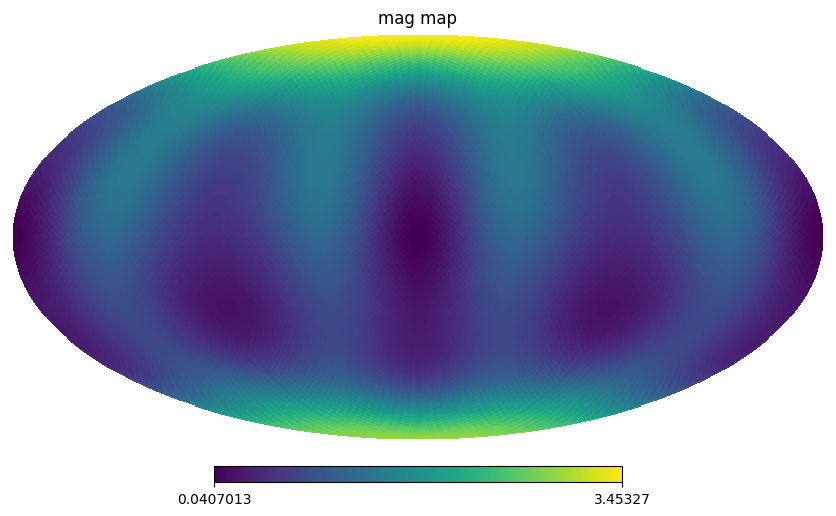

In [64]:
theta_chat = np.deg2rad(np.clip(theta, 0.0, 180.0))        # -> [0, pi]
phi_chat   = np.deg2rad((phi + 360.0) % 360.0)     

NSIDE = 32  # or pick another; 74 is close for ~65k samples
NPIX = hp.nside2npix(NSIDE)
pix = hp.ang2pix(NSIDE, theta_chat, phi_chat, nest=False)

counts = np.bincount(pix, minlength=NPIX)
sums   = np.bincount(pix, weights=total_mag, minlength=NPIX)

m = np.full(NPIX, hp.UNSEEN, dtype=float)   # RING-ordered map
mask = counts > 0
m[mask] = sums[mask] / counts[mask]

hp.mollview(m, title=f"mag map")


In [71]:
import os, re

def build_healpix_cube(
    sets: dict[str, list[str]],
    nside: int | None = None,
    agg: str = "mean",                # "mean" | "sum" | "median"
    verify_angles: bool = False,      # set True if you want to re-check theta/phi match per file
    order_nested: bool = False,       # return NESTED instead of RING
    save_npz_path: str | None = None  # optional: save cube+meta to .npz
):
    """
    Convert many CSVs (Phi[deg], Theta[deg], Gain...) from multiple 'sets' of
    measurements into a single array with shape (F, S, NPIX), where:
      - F = number of frequencies,
      - S = number of sets,
      - NPIX = 12 * NSIDE^2 (HEALPix).
    Returns: cube, freqs_hz (F,), set_names (S,), meta (dict)
    """
    # ---- helpers ----
    def parse_freq_hz(path: str) -> float:
        # Freq_11718745Hz.csv, Freq_11.7MHz.csv also supported
        m = re.search(r'(\d+(?:\.\d+)?)([kKmMgG]?)[Hh][Zz]', os.path.basename(path))
        if not m:
            raise ValueError(f"Cannot parse frequency from filename: {path}")
        val = float(m.group(1))
        suf = m.group(2).lower()
        scale = 1.0
        if   suf == 'k': scale = 1e3
        elif suf == 'm': scale = 1e6
        elif suf == 'g': scale = 1e9
        return val * scale

    def load_angles_gain(path: str, usecols=(0,1,2), delimiter=",", skiprows=1):
        # original format: Phi[deg], Theta[deg], Gain...
        phi_deg, theta_deg, gain = np.loadtxt(path, delimiter=delimiter,
                                              skiprows=skiprows, usecols=usecols, unpack=True)
        # Normalize to HEALPix angles
        theta = np.deg2rad(np.clip(theta_deg, 0.0, 180.0))      # colatitude in [0, pi]
        phi   = np.deg2rad((phi_deg + 360.0) % 360.0)           # longitude in [0, 2pi)
        return theta, phi, gain

    def infer_nside(theta, phi):
        M = theta.size
        guess = max(1, int(round((M / 12.0) ** 0.5)))
        candidates = sorted({max(1, guess-1), guess, guess+1, guess+2})
        best, score_best = None, -1.0
        for n in candidates:
            npix = hp.nside2npix(n)
            p = hp.ang2pix(n, theta, phi, nest=False)
            u = np.unique(p).size
            coverage = u / npix
            dupes = 1.0 - (u / M)
            score = coverage - 0.1 * dupes
            if score > score_best:
                best, score_best = n, score
        return best

    def reduce_per_pixel(pix, values, npix, how="mean"):
        counts = np.bincount(pix, minlength=npix)
        out = np.full(npix, hp.UNSEEN, float)
        if how in ("mean", "sum"):
            sums = np.bincount(pix, weights=values, minlength=npix)
            mask = counts > 0
            if how == "sum":
                out[mask] = sums[mask]
            else:
                out[mask] = sums[mask] / counts[mask]
        elif how == "median":
            # slower but robust
            order = np.argsort(pix)
            p_sorted = pix[order]
            v_sorted = values[order]
            # locate runs of same pixel
            starts = np.r_[0, np.flatnonzero(np.diff(p_sorted)) + 1]
            ends   = np.r_[starts[1:], p_sorted.size]
            for s, e in zip(starts, ends):
                idx = p_sorted[s]
                out[idx] = float(np.median(v_sorted[s:e]))
        else:
            raise ValueError(f"Unknown agg: {how}")
        return out

    # ---- organize inputs ----
    set_names = list(sets.keys())
    set_names.sort()
    # map: set_name -> {freq_hz: path}
    files_by_set = {}
    all_freqs = set()
    for s in set_names:
        freq_map = {}
        for path in sets[s]:
            f = parse_freq_hz(path)
            if f in freq_map:
                raise ValueError(f"Duplicate frequency {f} Hz in set '{s}'.")
            freq_map[f] = path
            all_freqs.add(f)
        files_by_set[s] = freq_map

    freqs_hz = np.array(sorted(all_freqs), dtype=float)
    F, S = freqs_hz.size, len(set_names)

    # ---- reference angles & NSIDE/pix mapping ----
    # Pick a reference file (first frequency in first set)
    ref_path = files_by_set[set_names[0]][freqs_hz[0]]
    theta_ref, phi_ref, _ = load_angles_gain(ref_path)
    if nside is None:
        nside = infer_nside(theta_ref, phi_ref)
    npix = hp.nside2npix(nside)
    pix_ref = hp.ang2pix(nside, theta_ref, phi_ref, nest=False)
    counts_ref = np.bincount(pix_ref, minlength=npix)  # reuse for mean aggregation

    # ---- build cube: (F, S, NPIX) ----
    cube = np.full((F, S, npix), hp.UNSEEN, dtype=float)

    for si, s in enumerate(set_names):
        freq_map = files_by_set[s]
        for fi, f in enumerate(freqs_hz):
            path = freq_map.get(f, None)
            if path is None:
                # Missing file for this frequency in this set; leave UNSEEN
                continue

            if verify_angles:
                # check and recompute pix if angles differ
                th, ph, gain = load_angles_gain(path)
                same = (th.shape == theta_ref.shape and
                        np.allclose(th, theta_ref) and
                        np.allclose(ph, phi_ref))
                pix = pix_ref if same else hp.ang2pix(nside, th, ph, nest=False)
            else:
                # fast path: just load gains assuming same angle order
                _, _, gain = load_angles_gain(path)

                # Use reference pix mapping
                pix = pix_ref

            # Aggregate to a map
            if agg == "mean" and not verify_angles:
                # Fast path: counts_ref works because pix_ref is reused
                sums = np.bincount(pix, weights=gain, minlength=npix)
                m = np.full(npix, hp.UNSEEN, float)
                mask = counts_ref > 0
                m[mask] = sums[mask] / counts_ref[mask]
            else:
                m = reduce_per_pixel(pix, gain, npix, how=agg)

            cube[fi, si, :] = m

    # ---- optional: convert to NESTED order on output ----
    order = "RING"
    if order_nested:
        cube = hp.reorder(cube, r2n=True, nside=nside)  # vectorized reorder over leading dims
        order = "NESTED"

    meta = {
        "nside": nside,
        "npix": npix,
        "order": order,
        "set_names": set_names,
        "freqs_hz": freqs_hz,
    }

    if save_npz_path:
        np.savez_compressed(save_npz_path,
                            cube=cube, freqs_hz=freqs_hz, set_names=np.array(set_names),
                            nside=nside, order=order)

    return cube, freqs_hz, set_names, meta


In [79]:
from glob import glob

sets = {
    "CoBeam_hp": sorted(glob("/home/dominiv/eigsep/data/july2025/beam_results/CoBeam Results_Slotted BowTie over a Simple Box/Freq_*Hz.csv")),
    "CrossBeam_hp": sorted(glob("/home/dominiv/eigsep/data/july2025/beam_results/CrossBeam Results_Slotted BowTie over a Simple Box/Freq_*Hz.csv")),
    "Gain_total": sorted(glob("/home/dominiv/eigsep/data/july2025/beam_results/Gain_Total/Freq_*Hz.csv")),
}

cube, freqs_hz, set_names, meta = build_healpix_cube(
    sets,
    nside=32,          # infer once from the first file
    agg="mean",          # or "sum"/"median"
    verify_angles=False, # set True if per-file angle order might differ
    order_nested=False,  # set True if you prefer NESTED output
    save_npz_path="healpix_cube_allsets.npz"
)

print(cube.shape)  # -> (F, 3, NPIX)
print(meta)


(52, 3, 12288)
{'nside': 32, 'npix': 12288, 'order': 'RING', 'set_names': ['CoBeam_hp', 'CrossBeam_hp', 'Gain_total'], 'freqs_hz': array([ 5078120.,  5468745.,  5859370.,  6249995.,  6640620.,  7031245.,
        7421870.,  7812495.,  8203120.,  8593745.,  8984370.,  9374995.,
        9765620., 10156245., 10546870., 10937495., 11328120., 11718745.,
       12109370., 12499995., 12890620., 13281245., 13671870., 14062495.,
       14453120., 14843745., 15234370., 15624995., 16015620., 16406245.,
       16796870., 17187495., 17578120., 17968745., 18359370., 18749995.,
       19140620., 19531245., 19921870., 20312495., 20703120., 21093745.,
       21484370., 21874995., 22265620., 22656245., 23046870., 23437495.,
       23828120., 24218745., 24609370., 24999995.])}


In [113]:
import os, re
import numpy as np
import healpy as hp

def build_cube_with_magnitude(
    sets: dict[str, list[str]],             # {set_name: [paths...]}  <-- includes all 5 sets
    base_set_order: list[str],              # e.g. ["A","B","C"]      <-- which 3 sets to return directly (and order)
    mag_pair: tuple[str, str],              # e.g. ("X","Y")          <-- the two *extra* sets to combine
    magnitude_name: str = "XY_mag",         # name for the derived set appended after the base sets
    nside: int | None = None,               # infer if None
    agg: str = "mean",                      # "mean" | "sum" | "median"
    verify_angles: bool = False,            # set True if theta/phi might differ across files
    order_nested: bool = False,             # return NESTED instead of RING
    save_npz_path: str | None = None        # optional: path to save cube + metadata
):
    """
    Convert many CSVs (Phi[deg], Theta[deg], Gain...) grouped by set into a cube with shape
    (F, S_out, NPIX), where S_out = len(base_set_order) + 1. The final axis order is
    base_set_order + [magnitude_name], and the magnitude is computed per-frequency, per-pixel
    as sqrt(X^2 + Y^2) from 'mag_pair'.

    Returns:
      cube:        (F, S_out, NPIX)  float (hp.UNSEEN for missing)
      freqs_hz:    (F,)              float sorted union of frequencies across all sets
      set_names:   list[str]         == base_set_order + [magnitude_name]
      meta:        dict              metadata including nside, npix, order, mapping info
    """
    # ---------- helpers ----------
    def parse_freq_hz(path: str) -> float:
        # supports: ...Hz, ...kHz, ...MHz, ...GHz (case-insensitive)
        m = re.search(r'(\d+(?:\.\d+)?)([kKmMgG]?)[Hh][Zz]', os.path.basename(path))
        if not m:
            raise ValueError(f"Cannot parse frequency from filename: {path}")
        val = float(m.group(1))
        suf = m.group(2).lower()
        return val * (1e3 if suf=='k' else 1e6 if suf=='m' else 1e9 if suf=='g' else 1.0)

    def load_angles_gain(path: str, usecols=(0,1,2), delimiter=",", skiprows=1):
        # Original format: Phi[deg], Theta[deg], Gain...
        phi_deg, theta_deg, gain = np.loadtxt(path, delimiter=delimiter,
                                              skiprows=skiprows, usecols=usecols, unpack=True)
        theta = np.deg2rad(np.clip(theta_deg, 0.0, 180.0))   # colatitude [0, pi]
        phi   = np.deg2rad((phi_deg + 360.0) % 360.0)        # longitude  [0, 2pi)
        return theta, phi, gain

    def infer_nside(theta, phi):
        M = theta.size
        guess = max(1, int(round((M/12.0)**0.5)))
        candidates = sorted({max(1,guess-1), guess, guess+1, guess+2})
        best_n, best_score = None, -1.0
        for n in candidates:
            npix = hp.nside2npix(n)
            p = hp.ang2pix(n, theta, phi, nest=False)
            u = np.unique(p).size
            coverage = u / npix
            dupes = 1.0 - (u / M)
            score = coverage - 0.1 * dupes
            if score > best_score:
                best_n, best_score = n, score
        return best_n

    def reduce_per_pixel(pix, values, npix, how="mean"):
        counts = np.bincount(pix, minlength=npix)
        out = np.full(npix, hp.UNSEEN, float)
        if how in ("mean","sum"):
            sums = np.bincount(pix, weights=values, minlength=npix)
            mask = counts > 0
            out[mask] = sums[mask] if how=="sum" else sums[mask]/counts[mask]
        elif how == "median":
            order = np.argsort(pix)
            p_sorted = pix[order]
            v_sorted = values[order]
            starts = np.r_[0, np.flatnonzero(np.diff(p_sorted))+1]
            ends   = np.r_[starts[1:], p_sorted.size]
            for s,e in zip(starts, ends):
                out[p_sorted[s]] = float(np.median(v_sorted[s:e]))
        else:
            raise ValueError(f"Unknown agg: {how}")
        return out

    def unseen_mask(arr):
        return (arr == hp.UNSEEN) | ~np.isfinite(arr)

    # ---------- organize inputs ----------
    all_set_names = list(sets.keys())
    for s in base_set_order + list(mag_pair):
        if s not in all_set_names:
            raise ValueError(f"Set '{s}' not found in provided 'sets' keys: {all_set_names}")

    # Build per-set mapping: set_name -> {freq_hz: path}
    files_by_set, all_freqs = {}, set()
    for s in all_set_names:
        freq_map = {}
        for path in sets[s]:
            f = parse_freq_hz(path)
            if f in freq_map:
                raise ValueError(f"Duplicate frequency {f} Hz in set '{s}'.")
            freq_map[f] = path
            all_freqs.add(f)
        files_by_set[s] = freq_map

    freqs_hz = np.array(sorted(all_freqs), float)
    F = freqs_hz.size

    # ---------- reference angles & NSIDE/pix mapping ----------
    # use the first file we can find among any sets for the first frequency
    ref_set = base_set_order[0] if freqs_hz[0] in files_by_set[base_set_order[0]] else all_set_names[0]
    ref_path = files_by_set[ref_set][freqs_hz[0]]
    theta_ref, phi_ref, _ = load_angles_gain(ref_path)

    if nside is None:
        nside = infer_nside(theta_ref, phi_ref)
    npix = hp.nside2npix(nside)
    pix_ref = hp.ang2pix(nside, theta_ref, phi_ref, nest=False)
    counts_ref = np.bincount(pix_ref, minlength=npix)  # reuse for fast mean aggregation

    # ---------- build base cube (F, S_base, NPIX) ----------
    S_base = len(base_set_order)
    base_cube = np.full((F, S_base, npix), hp.UNSEEN, float)

    for si, s in enumerate(base_set_order):
        freq_map = files_by_set[s]
        for fi, f in enumerate(freqs_hz):
            path = freq_map.get(f)
            if path is None:
                continue
            if verify_angles:
                th, ph, gain = load_angles_gain(path)
                same = (th.shape == theta_ref.shape and
                        np.allclose(th, theta_ref) and
                        np.allclose(ph, phi_ref))
                pix = pix_ref if same else hp.ang2pix(nside, th, ph, nest=False)
            else:
                _, _, gain = load_angles_gain(path)
                pix = pix_ref

            if agg=="mean" and not verify_angles and np.array_equal(pix, pix_ref):
                sums = np.bincount(pix_ref, weights=gain, minlength=npix)
                m = np.full(npix, hp.UNSEEN, float)
                mask = counts_ref > 0
                m[mask] = sums[mask] / counts_ref[mask]
            else:
                m = reduce_per_pixel(pix, gain, npix, how=agg)

            base_cube[fi, si, :] = m

    # ---------- compute magnitude from the two extra sets (F, NPIX) ----------
    sx, sy = mag_pair
    # For speed, assume same angles/order; recompute pix only if verify_angles=True
    mag = np.full((F, npix), hp.UNSEEN, float)
    fx = files_by_set[sx]
    fy = files_by_set[sy]

    for fi, f in enumerate(freqs_hz):
        px = fx.get(f)
        py = fy.get(f)
        if px is None or py is None:
            continue  # missing either component -> UNSEEN for that freq

        if verify_angles:
            thx, phx, gx = load_angles_gain(px)
            thy, phy, gy = load_angles_gain(py)
            samex = (thx.shape == theta_ref.shape and np.allclose(thx, theta_ref) and np.allclose(phx, phi_ref))
            samey = (thy.shape == theta_ref.shape and np.allclose(thy, theta_ref) and np.allclose(phy, phi_ref))
            pixx = pix_ref if samex else hp.ang2pix(nside, thx, phx, nest=False)
            pixy = pix_ref if samey else hp.ang2pix(nside, thy, phy, nest=False)
            mx = reduce_per_pixel(pixx, gx, npix, how=agg)
            my = reduce_per_pixel(pixy, gy, npix, how=agg)
        else:
            _, _, gx = load_angles_gain(px)
            _, _, gy = load_angles_gain(py)
            sums_x = np.bincount(pix_ref, weights=gx, minlength=npix)
            sums_y = np.bincount(pix_ref, weights=gy, minlength=npix)
            mx = np.full(npix, hp.UNSEEN, float)
            my = np.full(npix, hp.UNSEEN, float)
            mask = counts_ref > 0
            mx[mask] = sums_x[mask] / counts_ref[mask] if agg=="mean" else sums_x[mask]
            my[mask] = sums_y[mask] / counts_ref[mask] if agg=="mean" else sums_y[mask]
            if agg == "median":  # fallback if user demanded median but verify_angles=False
                # do exact median instead
                mx = reduce_per_pixel(pix_ref, gx, npix, how="median")
                my = reduce_per_pixel(pix_ref, gy, npix, how="median")

        valid = (~unseen_mask(mx)) & (~unseen_mask(my))
        tmp = mx**2 + my**2
        tmp[tmp < 0] = 0.0
        mag[fi, valid] = np.sqrt(tmp[valid])

    # ---------- stack: (F, S_base + 1, NPIX) ----------
    cube = np.concatenate([base_cube, mag[:, None, :]], axis=1)
    set_names = list(base_set_order) + [magnitude_name]

    # ---------- optional reorder to NESTED ----------
    order = "RING"
    if order_nested:
        cube = hp.reorder(cube, r2n=True, nside=nside)  # vectorized over leading dims
        order = "NESTED"

    meta = {
        "nside": nside,
        "npix": npix,
        "order": order,
        "base_set_order": base_set_order,
        "magnitude_from": tuple(mag_pair),
        "magnitude_name": magnitude_name,
        "freqs_hz": freqs_hz,
    }

    if save_npz_path:
        np.savez_compressed(
            save_npz_path,
            cube=cube,
            freqs_hz=freqs_hz,
            set_names=np.array(set_names, dtype=object),
            nside=nside,
            order=order,
            magnitude_from=np.array(mag_pair, dtype=object),
            magnitude_name=magnitude_name
        )

    return cube, freqs_hz, set_names, meta


In [114]:
from glob import glob

sets = {
    "CoBeam_hp": sorted(glob("/home/dominiv/eigsep/data/july2025/beam_results/CoBeam Results_Slotted BowTie over a Simple Box/Freq_*Hz.csv")),
    "CrossBeam_hp": sorted(glob("/home/dominiv/eigsep/data/july2025/beam_results/CrossBeam Results_Slotted BowTie over a Simple Box/Freq_*Hz.csv")),
    "Gain_total": sorted(glob("/home/dominiv/eigsep/data/july2025/beam_results/Gain_Total/Freq_*Hz.csv")),
    "Gain_theta": sorted(glob("/home/dominiv/eigsep/data/july2025/beam_results/Gain_Theta//Freq_*Hz.csv")),
    "Gain_phi": sorted(glob("/home/dominiv/eigsep/data/july2025/beam_results/Gain_Phi//Freq_*Hz.csv")),
}

cube, freqs_hz, set_names, meta = build_cube_with_magnitude(
    sets=sets,
    base_set_order=["CoBeam_hp","CrossBeam_hp","Gain_total"],   # keep these 3 as-is and in this order
    mag_pair=("Gain_theta","Gain_phi"),             # combine these 2 into one magnitude set
    magnitude_name="mag",        # name for the derived set
    nside=32,                     # infer once from angles
    agg="mean",
    verify_angles=False,            # set True if angles/order might differ by file
    order_nested=False,             # RING (mollview default)
    save_npz_path="cube_ABC_plus_XYmag.npz"
)

print(cube.shape)   # -> (F, 4, NPIX)  == A, B, C, XY_mag
print(set_names)    # -> ['A', 'B', 'C', 'XY_mag']


(52, 4, 12288)
['CoBeam_hp', 'CrossBeam_hp', 'Gain_total', 'mag']


In [97]:
print(set_names)

['CoBeam_hp', 'CrossBeam_hp', 'Gain_total', 'mag']


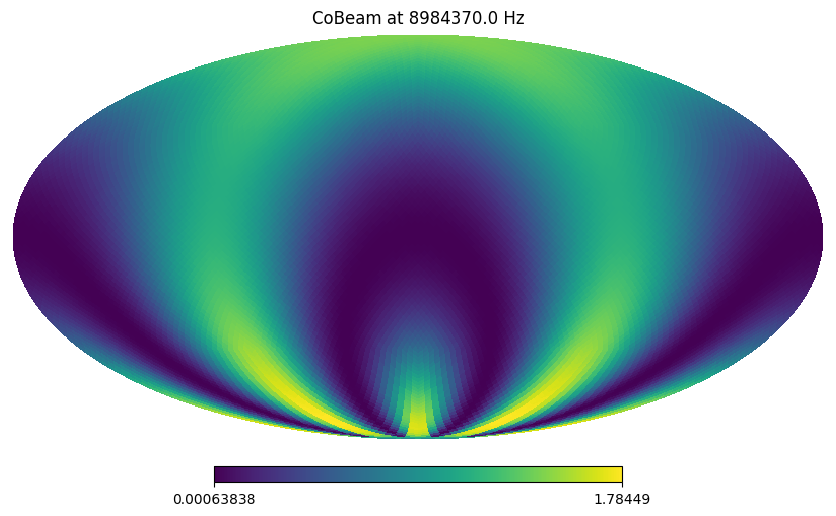

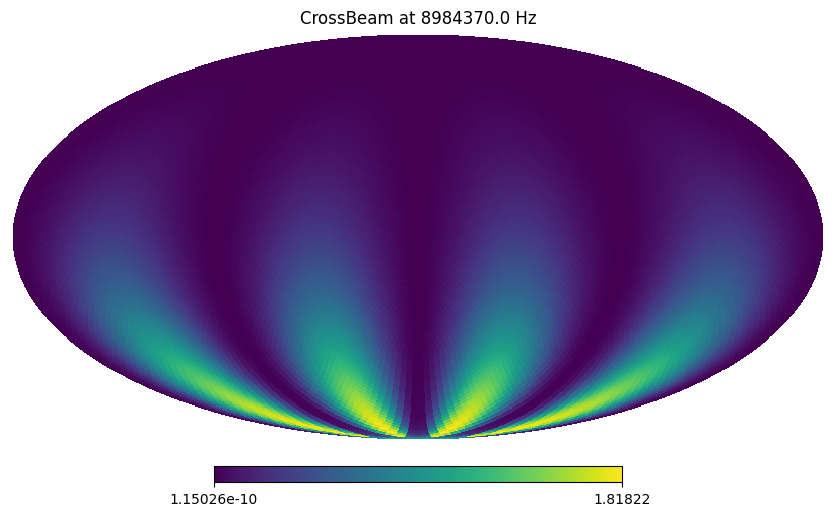

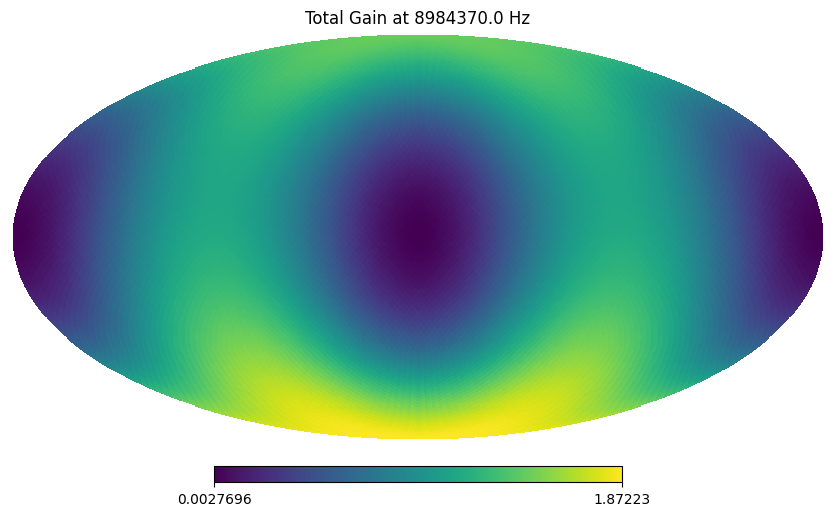

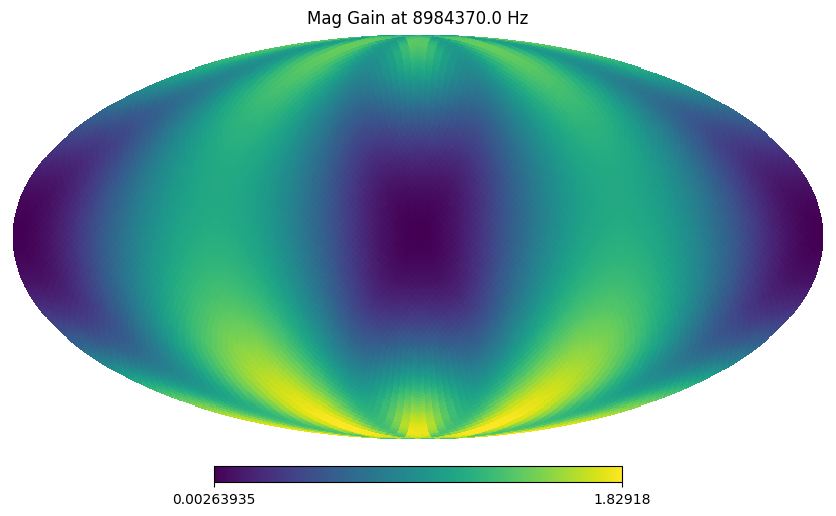

In [116]:
freq_ind = 10 
mag_calc = np.sqrt((cube[freq_ind, 0]**2) + (cube[freq_ind, 1]**2))
perc_diff = (cube[freq_ind, 2] - mag_calc) / (cube[freq_ind, 2]) * 100

hp.mollview(cube[freq_ind, 0], title=f'CoBeam at {freqs_hz[freq_ind]} Hz')
hp.mollview(cube[freq_ind, 1], title=f'CrossBeam at {freqs_hz[freq_ind]} Hz')
hp.mollview(cube[freq_ind, 2], title=f'Total Gain at {freqs_hz[freq_ind]} Hz')
# hp.mollview(mag_calc, title=f'Calculated Gain at {freqs_hz[freq_ind]} Hz')
# hp.mollview(perc_diff, title=f'Perc Diff Gain at {freqs_hz[freq_ind]} Hz')
hp.mollview(cube[freq_ind, 3], title=f'Mag Gain at {freqs_hz[freq_ind]} Hz')

In [102]:
cube.shape, freqs_hz.shape

((52, 4, 12288), (52,))

In [120]:
pwd

'/home/dominiv/eigsep/my_notebooks/july2025'

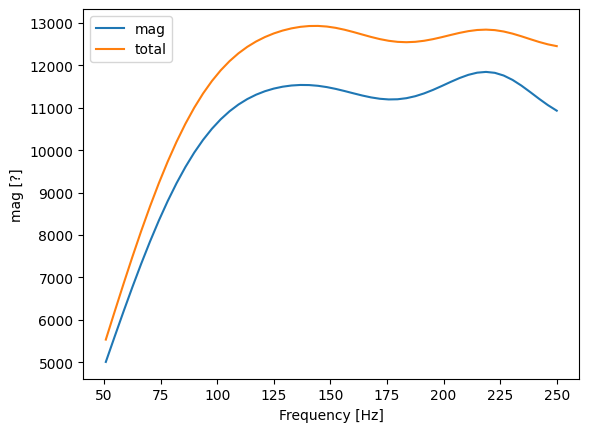

In [119]:
plt.figure()
plt.plot(freqs_hz / 1e5, np.sum(cube[:, 3], axis=1), label='mag')
plt.plot(freqs_hz / 1e5, np.sum(cube[:, 2], axis=1), label='total')
# plt.plot(freqs_hz / 1e5, np.sum(np.abs(cube[:, 2]**2), axis=1), label='total')
plt.xlabel('Frequency [Hz]')
plt.ylabel('mag [?]')
plt.legend()
plt.show()